In [ ]:
#objective: Detect Autistic Spectrum Disorder (ASD) cases

In [1]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [7]:
#load data
df = pd.read_csv('../datasets/autism.csv', sep=",", header=None)
df.columns = ['a1_score','a2_score','a3_score','a4_score',
'a5_score','a6_score','a7_score','a8_score',
'a9_score','a10_score','age','gender','ethnicity',
'jundice','autism','country_of_res',"used_app",
'result','age_desc','relation','class']

In [8]:
df_backup = df
df.head()

,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,...,gender,ethnicity,jundice,autism,country_of_res,used_app,result,age_desc,relation,class
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


In [9]:
df.shape

(704, 21)

In [10]:
#remove bad data
#check for missing data
nan_rows = df.isnull().T.any().T.sum()
#drop missing data
df = df.dropna()
df.shape

(609, 21)

In [11]:
#perform summary statistics
df.describe()

,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,age,result
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,0.740558,0.469622,0.481117,0.520525,0.525452,0.307061,0.428571,0.665025,0.341544,0.597701,30.215107,5.077176
std,0.438689,0.499487,0.500054,0.499989,0.499762,0.461654,0.495278,0.472370,0.474617,0.490765,17.287470,2.522717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


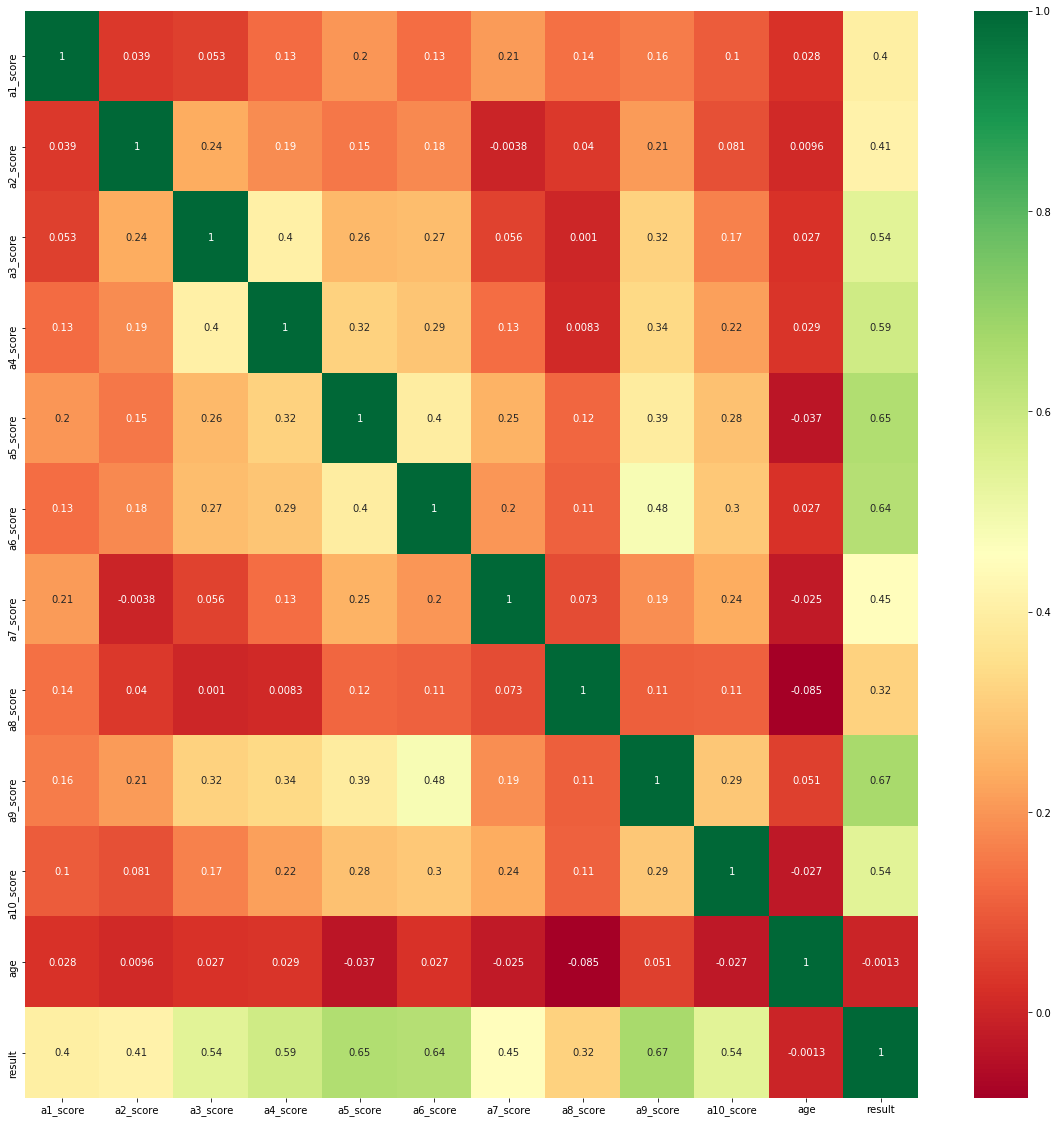

In [12]:
#correlation
x = df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [13]:
df_cat = df[['a1_score','a2_score','a3_score','a4_score',
'a5_score','a6_score','a7_score','a8_score',
'a9_score','a10_score','gender','ethnicity','jundice','autism','country_of_res',"used_app",'age_desc','relation']]
df_cat2 = pd.get_dummies(df_cat, columns=['a1_score','a2_score','a3_score','a4_score',
'a5_score','a6_score','a7_score','a8_score',
'a9_score','a10_score','gender','ethnicity','jundice','autism','country_of_res',"used_app",
                                          'age_desc','relation'], drop_first=False)
df_cat2.reset_index(drop=True, inplace=True)

In [14]:
#df.columns = ['a1_score','a2_score','a3_score','a4_score',
#'a5_score','a6_score','a7_score','a8_score',
#'a9_score','a10_score','age','gender','ethnicity',
#'jundice','autism','country_of_res',"used_app",
#'result','age_desc','relation','class']

#scale cts data
scaler = preprocessing.MinMaxScaler()
to_scale_df = df[['age','result']]
scaled_df = scaler.fit_transform(to_scale_df)
scaled_df = pd.DataFrame(scaled_df, columns=['age','result'])
scaled_df.reset_index(drop=True, inplace=True)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
df['class'].reset_index(drop=True, inplace=True)

In [16]:
#combine data
df_new = pd.concat([scaled_df, df_cat2,df['class']], axis=1)
df_new.shape

(609, 108)

In [17]:
#data split
X = df_new.drop('class', axis=1)
y = df_new[['class']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

KNN: 0.962268 (0.019436)
CART: 1.000000 (0.000000)
RF: 0.990164 (0.013115)
SGD: 0.990164 (0.015025)
GB: 1.000000 (0.000000)


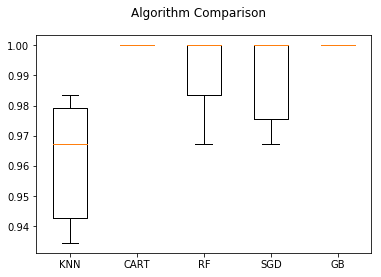

In [18]:
#design model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
#perform classification
array = df_new.values
X = array[:,0:107]
Y = array[:,107]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('GB', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [20]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [21]:
#perform confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=["0", "1"],
    index=["0", "1"]
)

,0,1
0,97,0
1,0,56
